In [2]:
!pip install transformers requests beautifulsoup4 pandas numpy


[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [2]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import re

In [3]:
tokenizer= AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

In [4]:
import os
import shutil
import tarfile
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
import pandas as pd
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [5]:
current_folder=os.getcwd() 
dataset=tf.keras.utils.get_file(fname= "aclImdb.tar.gz", 
                                origin= "http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz",
                               cache_dir=current_folder,
                               extract=True)

In [6]:
# check the dataset
dataset_path= os.path.dirname(dataset)
os.listdir(dataset_path)

['.DS_Store', 'aclImdb', 'aclImdb.tar.gz']

In [7]:
# check the dataset directory
dataset_dir=os.path.join(dataset_path, "aclImdb")
os.listdir(dataset_dir)

['imdbEr.txt', 'test', 'imdb.vocab', 'README', 'train']

In [8]:
# check the train dataset folder
train_dir=os.path.join(dataset_dir,"train")
os.listdir(train_dir)

['urls_unsup.txt',
 'neg',
 'urls_pos.txt',
 'unsup',
 'urls_neg.txt',
 'pos',
 'unsupBow.feat',
 'labeledBow.feat']

In [9]:
# read the files of the train directory
for file in os.listdir(train_dir):
    file_path= os.path.join(train_dir, file)
    # check if it is a file not a directory
    if os.path.isfile(file_path):
        with open(file_path, 'r', encoding='utf-8') as f:
            first_value=f.readline().strip()
            print(f"{file}: {first_value}")
    else:
        print(f"{file}:{file_path}")

urls_unsup.txt: http://www.imdb.com/title/tt0018515/usercomments
neg:/Users/user/Downloads/Machine_learning_project/sentiment_analysis/datasets/aclImdb/train/neg
urls_pos.txt: http://www.imdb.com/title/tt0453418/usercomments
unsup:/Users/user/Downloads/Machine_learning_project/sentiment_analysis/datasets/aclImdb/train/unsup
urls_neg.txt: http://www.imdb.com/title/tt0064354/usercomments
pos:/Users/user/Downloads/Machine_learning_project/sentiment_analysis/datasets/aclImdb/train/pos
unsupBow.feat: 0 0:8 1:6 3:5 4:2 5:1 7:1 8:5 9:2 10:1 11:2 13:3 16:1 17:1 18:1 19:1 22:3 24:1 26:3 28:1 30:1 31:1 35:2 36:1 39:2 40:1 41:2 46:2 47:1 48:1 52:1 63:1 67:1 68:1 74:1 81:1 83:1 87:1 104:1 105:1 112:1 117:1 131:1 151:1 155:1 170:1 198:1 225:1 226:1 288:2 291:1 320:1 331:1 342:1 364:1 374:1 384:2 385:1 407:1 437:1 441:1 465:1 468:1 470:1 519:1 595:1 615:1 650:1 692:1 851:1 937:1 940:1 1100:1 1264:1 1297:1 1317:1 1514:1 1728:1 1793:1 1948:1 2088:1 2257:1 2358:1 2584:2 2645:1 2735:1 3050:1 4297:1 5385

In [61]:
data

NameError: name 'data' is not defined

In [10]:
def load_dataset(directory):
    data= {"sentence": [], "sentiment": []}
    for file_name in os.listdir(directory):
        print(file_name)
        if file_name == 'pos':
            positive_dir=os.path.join(directory, file_name)
            for text_file in os.listdir(positive_dir):
                text=os.path.join(positive_dir,text_file)
                with open(text, "r", encoding="utf-8") as f:
                    data["sentence"].append(f.read())
                    data["sentiment"].append(1)
        elif file_name =='neg':
            negative_dir=os.path.join(directory,file_name)
            for text_file in os.listdir(negative_dir):
                text=os.path.join(negative_dir, text_file)
                with open(text, "r", encoding="utf-8") as f:
                    data["sentence"].append(f.read())
                    data["sentiment"].append(0)
    return pd.DataFrame.from_dict(data)

In [11]:
# load the dataset from the train_dir
train_df= load_dataset(train_dir)
print(train_df.head())

urls_unsup.txt
neg
urls_pos.txt
unsup
urls_neg.txt
pos
unsupBow.feat
labeledBow.feat
                                            sentence  sentiment
0  Working with one of the best Shakespeare sourc...          0
1  Well...tremors I, the original started off in ...          0
2  Ouch! This one was a bit painful to sit throug...          0
3  I've seen some crappy movies in my life, but t...          0
4  "Carriers" follows the exploits of two guys an...          0


In [12]:
train_df

,sentence,sentiment
0,Working with one of the best Shakespeare sourc...,0
1,"Well...tremors I, the original started off in ...",0
2,Ouch! This one was a bit painful to sit throug...,0
3,"I've seen some crappy movies in my life, but t...",0
4,"""Carriers"" follows the exploits of two guys an...",0
...,...,...
24995,About a year ago I finally gave up on American...,1
24996,When I saw the elaborate DVD box for this and ...,1
24997,"Last November, I had a chance to see this film...",1
24998,Great movie -I loved it. Great editing and use...,1


In [26]:
test_dir=os.path.join(dataset_dir,'test')

# load the dataset from the train_dir
test_df=load_dataset(test_dir)
print(test_df.head())

neg
urls_pos.txt
urls_neg.txt
pos
labeledBow.feat
                                            sentence  sentiment
0  Alan Rickman & Emma Thompson give good perform...          0
1  I have seen this movie and I did not care for ...          0
2  In Los Angeles, the alcoholic and lazy Hank Ch...          0
3  This film is bundled along with "Gli fumavano ...          0
4  I only comment on really very good films and o...          0


In [27]:
test_df.shape

(25000, 2)

In [16]:
# preprocessing the data
sentiment_counts=train_df['sentiment'].value_counts()

fig= px.bar(x={0:'Negativity', 1:'Positivity'},
           y=sentiment_counts.values,
           color=sentiment_counts.index,
           color_discrete_sequence=px.colors.qualitative.Dark24,
           title='<b>Sentiments Counts')
fig.update_layout(title='Sentiments Counts',
                 xaxis_title='Sentiment',
                 yaxis_title='Counts',
                 template='plotly_dark')

# show the bar chart
fig.show()
pyo.plot(fig,filename= 'Sentiments Counts.html', auto_open=True)

'Sentiments Counts.html'

In [19]:
# text cleaning
def text_cleaning(text):
    soup = BeautifulSoup(text,"html.parser")
    text=re.sub(r'\[[^]]*\]' , '', soup.get_text())
    pattern= r"[^a-zA-Z0-9\s,']"
    text= re.sub(pattern , '', text)
    return text

In [28]:
#Train dataset
train_df['Cleaned_sentence'] = train_df['sentence'].apply(text_cleaning).tolist()
#Test dataset
test_df['Cleaned_sentence']=test_df['sentence'].apply(text_cleaning)

/var/folders/6d/xn3fbvys2fn7sbkbyfpdcny40000gn/T/ipykernel_827/3232722890.py:3: MarkupResemblesLocatorWarning:

The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.



In [42]:
test_df['Cleaned_sentence'][1]

'I have seen this movie and I did not care for this movie anyhow I would not think about going to Paris because I do not like this country and its national capital I do not like to learn french anyhow because I do not understand their language Why would I go to France when I rather go to Germany or the United Kingdom Germany and the United Kingdom are the nations I tolerate Apparently the Olsen Twins do not understand the French language just like me Therefore I will not bother the France trip no matter what I might as well stick to the United Kingdom and meet single women and play video games if there is a video arcade That is all'

In [43]:
test_df['sentence'][1]

'I have seen this movie and I did not care for this movie anyhow. I would not think about going to Paris because I do not like this country and its national capital. I do not like to learn french anyhow because I do not understand their language. Why would I go to France when I rather go to Germany or the United Kingdom? Germany and the United Kingdom are the nations I tolerate. Apparently the Olsen Twins do not understand the French language just like me. Therefore I will not bother the France trip no matter what. I might as well stick to the United Kingdom and meet single women and play video games if there is a video arcade. That is all.'

In [52]:
# function to generate the wordcloud
def generate_wordcloud(text,Title):
    all_text="".join(text)
    wordcloud=WordCloud(width=800, 
                        height=400, 
                        stopwords=set(STOPWORDS),
                       background_color='black').generate(all_text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(Title)
    plt.show()

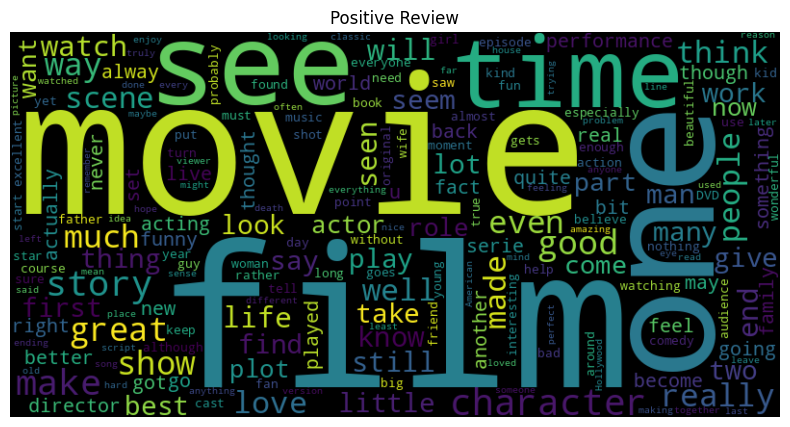

In [53]:
positive=train_df[train_df['sentiment']==1]['Cleaned_sentence'].tolist()
generate_wordcloud(positive, 'Positive Review')

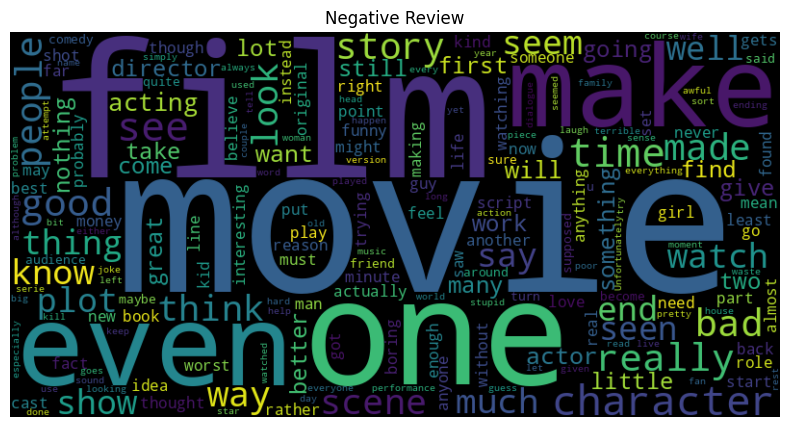

In [54]:
negative=train_df[train_df['sentiment']==0]['Cleaned_sentence'].tolist()
generate_wordcloud(negative,'Negative Review')

In [55]:
# Training data
# Reviews 
Reviews=train_df['Cleaned_sentence']
Target=train_df['sentiment']

# Test_data
test_reviews=test_df['Cleaned_sentence']
test_targets=test_df['sentiment']

In [56]:
# split the test data into test and validation

x_val, x_test, y_val, y_test= train_test_split(test_reviews, test_targets, test_size=0.5,
                                              stratify=test_targets)

In [ ]:
# load the pre trained bert tokenizer

In [59]:
tokenizer=BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/opt/homebrew/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning:

`resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.



config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [60]:
max_len=128
X_train_encoded=tokenizer.batch_encode_plus(Reviews.tolist(),
                                            padding=True,
                                            truncation=True,
                                            max_length= max_len,
                                            return_tensors='tf'
                                           )
X_val_encoded= tokenizer.batch_encode_plus(x_val.tolist(),
                                          padding=True,
                                          truncation=True,
                                          max_length=max_len,
                                          return_tensors='tf')
X_test_encoded= tokenizer.batch_encode_plus(x_test.tolist(),
                                           padding=True,
                                           max_length=max_len,
                                           return_tensors='tf')

/opt/homebrew/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:2717: UserWarning:

`max_length` is ignored when `padding`=`True` and there is no truncation strategy. To pad to max length, use `padding='max_length'`.



In [62]:
X_train_encoded

{'input_ids': <tf.Tensor: shape=(25000, 128), dtype=int32, numpy=
array([[  101,  2551,  2007, ...,     0,     0,     0],
       [  101,  2092,  7913, ...,  1010,  1045,   102],
       [  101, 15068,  2818, ...,  2021,  2017,   102],
       ...,
       [  101,  2197,  2281, ...,  2083,  1037,   102],
       [  101,  2307,  3185, ...,  7167,  1997,   102],
       [  101, 22454,  2258, ..., 10684,  2116,   102]], dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(25000, 128), dtype=int32, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(25000, 128), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype

In [63]:
# check the encoded dataset
k=0
print('Training Comments -->>', Reviews[k])
print('\nInput Ids -->>\n',X_train_encoded['input_ids'][k])
print('\nDecoded Ids -->>\n', tokenizer.decode(X_train_encoded['input_ids'][k]))
print('\nAttention Mask -->> \n',X_train_encoded['attention_mask'][k])
print('\nLabels -->>', Target[k])

Training Comments -->> Working with one of the best Shakespeare sources, this film manages to be creditable to it's source, whilst still appealing to a wider audienceBranagh steals the film from under Fishburne's nose, and there's a talented cast on good form

Input Ids -->>
 tf.Tensor(
[  101  2551  2007  2028  1997  1996  2190  8101  4216  1010  2023  2143
  9020  2000  2022  4923  3085  2000  2009  1005  1055  3120  1010  5819
  2145 16004  2000  1037  7289  4378 10024  2532  5603 15539  1996  2143
  2013  2104  3869  8022  2063  1005  1055  4451  1010  1998  2045  1005
  1055  1037 10904  3459  2006  2204  2433   102     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0 

In [64]:
# build a classification model
model= TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [75]:
# compile the model with an appropriate optimizer, loss function and metrics
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [ ]:
# Step 5: Train the model
history = model.fit(
	[X_train_encoded['input_ids'], X_train_encoded['token_type_ids'], X_train_encoded['attention_mask']],
	Target,
	validation_data=(
	[X_val_encoded['input_ids'], X_val_encoded['token_type_ids'], X_val_encoded['attention_mask']],y_val),
	batch_size=32,
	epochs=3
)`

Epoch 1/3
782/782 [==============================] - 6368s 8s/step - loss: 0.3406 - accuracy: 0.8467 - val_loss: 0.2647 - val_accuracy: 0.8882
Epoch 2/3
166/782 [=====>........................] - ETA: 1:02:34 - loss: 0.2003 - accuracy: 0.9207

In [1]:
# evaluate the model on the test data
test_loss,test_accuracy = model.evaluate(
    [X_test_encoded['input_ids'], X_test_encoded['token_type_ids'], 
     X_test_encoded['attention_mask']], 
    y_test)
print(f'Test loss: {test_loss}, Test_accuracy: {test_accuracy}')


NameError: name 'model' is not defined

In [ ]:
# save the model and tokenizer to the local folder
path = 'path-to-save'
# save tokenizer
tokenizer.save_pretrained(path+ '/Tokenizer')

# save model
model.save_pretrained(path+ '/Model')

In [ ]:
# laod the model and tokenizer from the local folder

# Load tokenizer
bert_tokenizer= BertTokenizer.from_pretrained(path + '/Tokenizer')

#Load model
bert_model= TFBertForSequenceClassification.from_pretrained(path+ '/Model')


In [ ]:
# predict the sentiment of the test dataset

pred = bert_model.predict(
[X_test_encoded['input_ids'], X_test_encoded['token_type_ids'],
X_test_encoded['attention_mask']]
)
# pred is of type TFSequenceClassifierOutput

logits=pred.logits

# use argmax along the appropriate axis to get the predicted labels
pred_labels= tf.argmax(logits,axis=1)

#Convert the predicted labels to a Numpy array
pred_labels= pred_labels.numpy()

label = {
    1: 'positive',
    0: 'Negative'
}

# Map the predicted labels to their corresponding strings using the label dictionary

pred_labels= [labels[i] for i in pred_labels]
Actual= [label[i] for i in y_test]

print('Predicted Label :', pred_labels[:10])
print('Actual Label :', Actual[:10])

In [ ]:
# classification report
print("Classification Report: \n", classification_report(Actual, pred_labels))


In [ ]:
# prediction with the user inputs

def Get_sentiment(Review, Tokenizer= bert_tokenizer, Model= bert_model):
    # convert review to a list if it is not already a list
    if not isinstance(Review,list):
        Review=[Review]
        
    Input_ids, Token_type_ids, Attention_mask = Tokenizer.batch_encode_plus(Review,
                                                                           padding=True,
                                                                           truncation=True,
                                                                           max_length=128,
                                                                           return_tensors='tf').values()
    prediction=Model.predict([Input_ids, Token_type_ids, Attention_mask])
    
    # use argmax along the appropriate axis to get the predicted labels
    pred_labels= tf.argmax(prediction.logits, axis=1)
    
    # convert the tensorflow tensor to a numpy array and then to a list to get the predicted sentimen labels
    
    pred_labels= [label[i] for i in pred_labels.numpy().tolist()]
    return pred_labels
    

In [ ]:
# lets predict our own review 
Review= ''' Bahubali is an amazing movie'''
Get_sentiment(Review)